### load data

In [1]:
# data used for training
import pickle as pkl
import numpy as np


data = pkl.loads(open('../data/de_800.data1-3.pkl', 'rb').read())
train_X = data['train_X']
train_Y = data['train_Y']
valid_X = data['valid_X']
valid_Y = data['valid_Y']
test_X  = data['test_X']
test_Y  = data['test_Y']

### test the model given by paper

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import copy

In [4]:
import caffe
caffe.set_mode_gpu()

D:\Tools\Anaconda3-py35\lib\importlib\_bootstrap.py:222: RuntimeWarning: to-Python converter for class boost::shared_ptr<class caffe::Net<float> > already registered; second conversion method ignored.
  return f(*args, **kwds)
D:\Tools\Anaconda3-py35\lib\importlib\_bootstrap.py:222: RuntimeWarning: to-Python converter for class boost::shared_ptr<class caffe::Blob<float> > already registered; second conversion method ignored.
  return f(*args, **kwds)
D:\Tools\Anaconda3-py35\lib\importlib\_bootstrap.py:222: RuntimeWarning: to-Python converter for class caffe::SolverParameter already registered; second conversion method ignored.
  return f(*args, **kwds)
D:\Tools\Anaconda3-py35\lib\importlib\_bootstrap.py:222: RuntimeWarning: to-Python converter for class caffe::LayerParameter already registered; second conversion method ignored.
  return f(*args, **kwds)
D:\Tools\Anaconda3-py35\lib\importlib\_bootstrap.py:222: RuntimeWarning: to-Python converter for class boost::shared_ptr<class caffe::

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xa

SystemError: initialization of _caffe raised unreported exception

In [10]:
folder = '../model/caffe/'
model = caffe.Net(folder+'Red_CNN.prototxt',
                  folder+'Red_CNN.caffemodel',
                  caffe.TEST)


NameError: name 'caffe' is not defined

In [92]:
results_caffe = []
for i in range(20):
    model.blobs['data'].data[...] = test_X[i:i+1,:,:,:].transpose((0, 3, 1, 2))
    res = model.forward()
    print(res['eltwise2'].mean())
    results_caffe.append(copy.copy(res['eltwise2']))
results_caffe = np.concatenate(results_caffe, axis = 0)

0.35998604
0.32881075
0.3563008
0.333992
0.31217673
0.34653768
0.32225162
0.3312201
0.3617111
0.31214112
0.31739163
0.3385001
0.36404976
0.29859793
0.3752165
0.29378104
0.31942704
0.30165574
0.35168546
0.29817444


In [29]:
def mse(X, Y):
    return ((X - Y).reshape(-1)**2).mean()

In [103]:
mse(test_X, results_caffe)

0.089400016

In [25]:
def show_effect(X, denoise, Y, difference):
    f = plt.figure(figsize = (10,10))
    plt.imshow(np.vstack([np.hstack([X,denoise]),np.hstack([Y,difference])]),
               cmap = plt.cm.gray)
    plt.show()

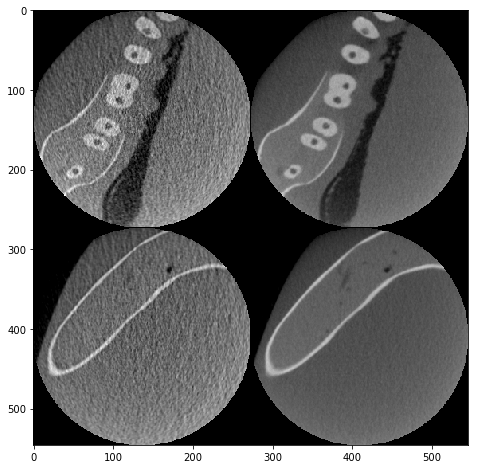

In [4]:
show_effect(train_X[12,:,:,0], train_Y[12,:,:,0], train_X[117,:,:,0], train_Y[117,:,:,0])

In [7]:
ID = 6
X = test_X[ID,:,:,0]
denoise = results_caffe1[ID,0,...]
Y = test_Y[ID,:,:,0]
difference = X - denoise

show_effect(X, denoise, Y, difference)


NameError: name 'results_caffe1' is not defined

### test the trained model

In [5]:
import keras
from train_v010 import model_construction, get_paras

D:\Tools\Anaconda3-py35\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
paras = get_paras()
paras['patch_h'] = 273
paras['patch_w'] = 273
paras['input/h'] = 273
paras['input/w'] = 273
model = model_construction(paras)

In [62]:
model.load_weights('../model/v010/55x55.2280.weights')

In [63]:
res = model.predict(train_X[:50])

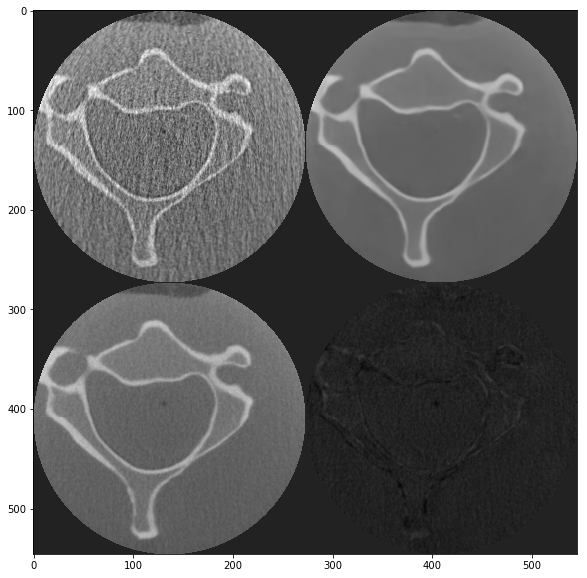

In [77]:
ID = 28
show_effect(train_X[ID,:,:,0], res[ID,:,:,0], train_Y[ID,:,:,0], train_Y[ID,:,:,0]-res[ID,:,:,0])

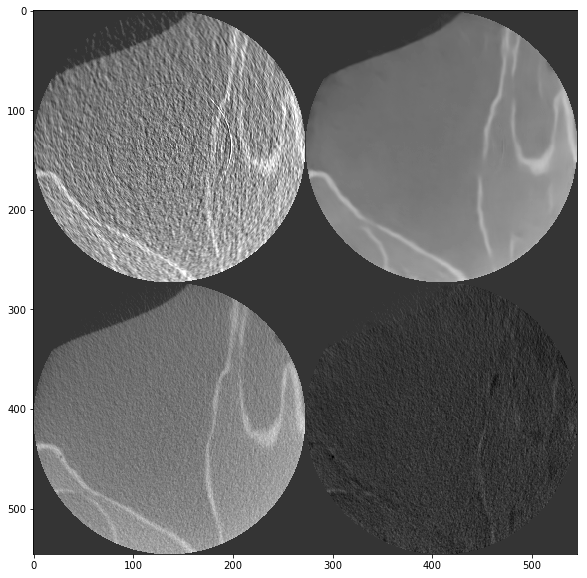

In [33]:
ID = 4
show_effect(test_X[ID,:,:,0], res[ID,:,:,0], test_Y[ID,:,:,0], test_Y[ID,:,:,0]-res[ID,:,:,0])

In [54]:
print(mse(res, test_Y))
print(mse(res2, test_Y))

0.0006629932
0.0010308721


In [37]:
res2 = model.predict(test_X)

In [51]:
ID = 5

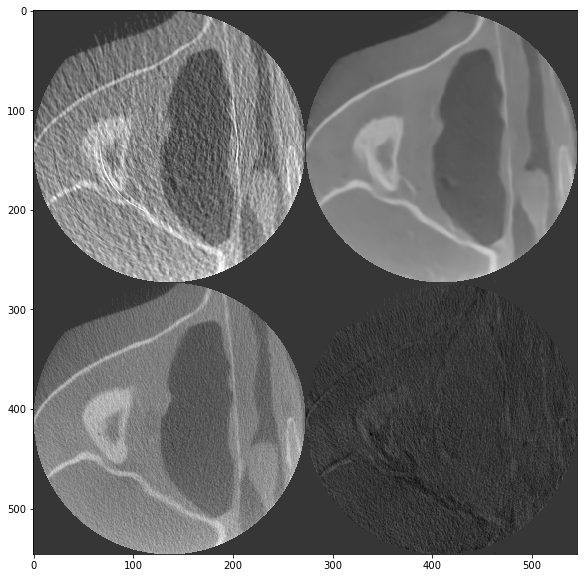

In [52]:
show_effect(test_X[ID,:,:,0], res[ID,:,:,0], test_Y[ID,:,:,0], test_Y[ID,:,:,0]-res[ID,:,:,0])

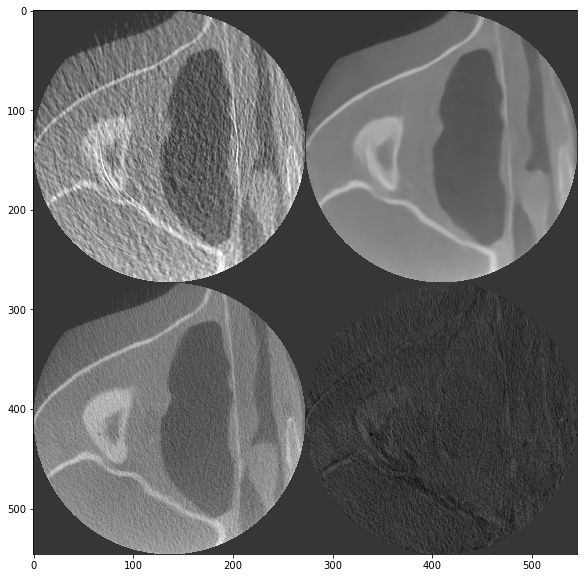

In [53]:
show_effect(test_X[ID,:,:,0], res2[ID,:,:,0], test_Y[ID,:,:,0], test_Y[ID,:,:,0]-res[ID,:,:,0])